# Final Exam will be emailed between 16:00 and 16:30 EDT on 28 Nov

<br><br>

# Final Exam submission due 5 Dec by 16:30 EDT on Blackboard

<br><br>

# Late submission will receive a failing grade

<br><br>

# Solution to final exam will be reviewed at the 12/5 lecture

<br><br><br><br>

#  Lecture 11b - Hough Transforms

<br><br>

<b>The Hough transform is designed to find particular shapes at any location and any orientation within an image</b><br><br>

<b>We will focus the detection of lines and annular rings</b><br><br>

<b>Hough transformations for other shapes are possible, but generally other approaches are preferred</b><br><br>

<b>For example, a Hough transform for a circle is the same as a set of correlations with different sized rings</b><br><br>

<b>The correlation method is faster and with the use of composite filtering can become even more efficient</b><br><br>

<b>Thus, the Hough transform is generally applied to detect simple line shapes</b><br><br>

<br><br><br><br>

## Detection of a Line

<br>

<b>Consider an image that contains only a long straight line on a black background</b><br><br>

<b>Each pixel is identified by its $(x,y)$ location</b><br><br>

<b>The Hough transform maps these points into a new space according to

$r = x \cos \theta + y \sin \theta$  (called the Hesse normal form)

where $(x,y)$ are the locations of any point in the input space and $(r,\theta)$ is the new location in the output space
</b><br><br>

<b>This is not a polar transformation and in fact is not a one-to-one mapping</b><br><br>

<br><br>

<b>A single point in the input space actually maps to a series of points in the output space</b><br><br>

<b>The vertical axis in this image is $r$ and the horizontal image is $\theta$ and a single point in the input space creates a curve in the output space</b><br><br>

<b>Through this single point there are an infinite number of lines that can pass through it</b><br><br>

<b>This output curve represents all of these possibilities were $r$ is the distance from the origin to the perpendicular point of the line and $\theta$ is the angle of the line</b><br><br>

<br><br>

<b>The operator for the Hough transform is $H$ for a line transform and $H_0$ for a circular transform</b><br><br>

<b>Thus, the expression to convert an input image ${\bf a}[\vec x]$ is

${\bf b}[\vec y] = H {\bf a}[\vec x]$
</b><br><br>

<b>The function LineHough performs this transform</b><br><br>

<b>It receives two inputs with data being the input data and  gamma as a threshold</b><br><br>

<b>In some cases, the data can have low noise values and these are discarded by the threshold value</b><br><br>

<b>The output space is created and the height depends on the size of the image size a larger image can produce a larger value of $r$</b><br><br>

<b>However, the horizontal range is fix at 180 pixels so that each column corresponds to 1 degree of rotation</b><br><br>

<b>The process starts by creating a replica of the input</b><br><br>

<b>Each point above a threshold is considered in the loop starting</b><br><br>

<b>The iterations continue until there are no pixels in work that are above the threshold</b><br><br>

<br><br>

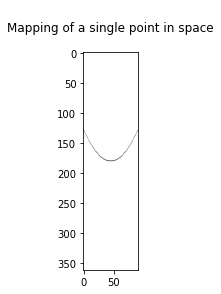

In [1]:
#  example of Hough transform
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio

def LineHough(data, gamma):
    V,H = data.shape
    R = int(np.sqrt(V*V + H*H))    
    ho = np.zeros((R,90), float) # Hough space
    work = data + 0
    ok = 1
    theta = np.arange(90)/180. * np.pi
    tp = np.arange(90).astype(float) # theta for plotting
    while ok:
        mx = work.max()
        if mx < gamma:
            ok = 0
        else:
            v,h = divmod(work.argmax(), H)
            y = V-v; x = h
            rho = x * np.cos(theta) + y*np.sin(theta)
            for i in range(len(rho)):
                if 0 <= rho[i] < R and 0<=tp[i]<90:
                    ho[int(rho[i]),int(tp[i])] += mx
            work[v,h] = 0
    return ho

adata = np.zeros((256,256))
adata[128,128] = 1

bdata = LineHough(adata, .5)

plt.title('\nMapping of a single point in space\n')
plt.imshow(-bdata, cmap='gray')
plt.show()


<br><br><br><br>

<b>Consider a case in which the input space has two points instead of one</b><br><br>

<b>Each creates a curve</b><br><br>

<b>However, two points also define a line and so there is one point where both curves intersect</b><br><br>

<b>This point defines a line where $r$ is the distance to the original and $\rho$ is the angle of the line</b><br><br>

<b>The creation of this image is shown below</b><br><br>

<b>A second point is added and LineHough is called again</b><br><br>

<b>The last example shows the case where the input is a perfect line</b><br><br>

<b>Each point creates a curve but since all of the input points are on a line then all of the output curves intersect at a single point</b><br><br>

<br><br>

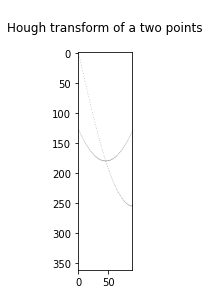

In [2]:
adata[0,0] = 1
bdata = LineHough(adata, 0.5)

plt.title('\nHough transform of a two points\n')
plt.imshow(-bdata, cmap='gray')
plt.show()


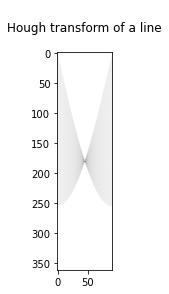

In [3]:
for i in range(256):
    adata[i,i] = 1
bdata = LineHough(adata, 0.5)

plt.title('\nHough transform of a line\n')
plt.imshow(-(np.sqrt(bdata)), cmap='gray')
plt.show()


<br><br><br><br>

<b>The location of the output intersection is sensitive to the input line's orientation and location</b><br><br>

<b>The below example shows the case were a line is shifted in space</b><br><br>

<b>The location of the peak has shifted downwards</b><br><br>

<b>However, there is no horizontal displacement as the angle of the input line is unchanged</b><br><br>

<b>The input line is merely shifted and that changes only $r$ which is displayed as a vertical shift in the output</b><br><br>

<br><br>

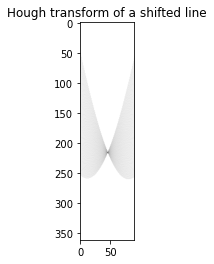

In [4]:
adata = np.zeros((256,256))
for i in range(205):
    adata[i,i+50] = 1
    
bdata = LineHough(adata, 0.5)

plt.title('Hough transform of a shifted line')
plt.imshow(-(np.sqrt(bdata)), cmap='gray')
plt.show()


<br><br><br><br>

<b>Example below creates a line at different location and a different orientation</b><br><br>

<b>The output as seen the intersection point has shifted in both the vertical and horizontal dimensions because the line has a different position and orientation then its predecessor</b><br><br>

<br><br>

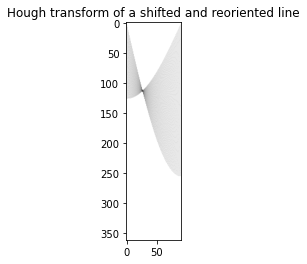

In [5]:
adata = np.zeros((256,256))
for i in range(256):
    adata[i,int(i*0.5)] = 1
bdata = LineHough(adata, 0.5)

plt.title('Hough transform of a shifted and reoriented line')
plt.imshow(-(np.sqrt(bdata)), cmap='gray')
plt.show()


<br><br><br><br>

## Detection of a Circle

<br>

<b>The Hough transform can be applied to any shape, but such an operation may increase the output dimensionality</b><br><br>

<b>For example a circle has a location but also has a radius, thus there is an extra dimension to accommodate the additional parameter</b><br><br>

<b>Consider the Hough transform for a specific radius $R$</b><br><br>

<b>A single point in the input space creates a circle of radius $R$ in the output space</b><br><br>

<b>Thus, three points that lie on a circle of radius $R$ in the input space will create three intersecting rings in the output space as shown below</b><br><br>

<b>The location of the intersection is indicative of the location of the circle in the input space</b><br><br>

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lectures13_14_15_16_17_18/L14_1.png?raw=true" width="200"/img></div>
<br><br>

<b>If the Hough transform radius does not match the radius of the input circle then the circles do not intersect a single location</b><br><br>

<b>Instead there is a ring where intersections occur and this ring increases in width as the difference between the transform radius and input radius increase</b><br><br>

<b>Thus, in a full Hough transform that considers all radii the output will be two opposing cones that expand in opposite directions in the third dimension of the output space</b><br><br>

<br><br>

<b>An input with a single ring has several points, each of which create a ring in the output space</b><br><br>

<b>If the radius of the ring matches the radius of the transform plane then all of the output rings intersect</b><br><br>

<b>The output space for a single radius $R$ is a two-dimensional image which is the correlation of the input image with a ring of radius $R$</b><br><br>

<b>The three dimensional has several planes which are the correlations with rings of various radii</b><br><br>

<b>So, the computation of this output space does not require a new function </b><br><br>

<br><br>

<b>The operator notation is

${\bf b}[\vec y] = H_0 {\bf a}[\vec x]$ 
</b><br><br>

<b>As an example an image is created using the RandomRings function</b><br><br>

<b>A couple of the rings have a radius near 36 and so a new image is created with the Ring function that creates a ring with that radius</b><br><br>

<b>The output which is just one plane from the full Hough transform</b><br><br>

<b>The image shows two peaks which are indicative of the existence of two rings with the specified radius</b><br><br>

<b>The full Hough transform would correlate the image with rings with radii from large to small</b><br><br>

<br><br>

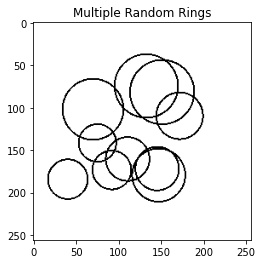

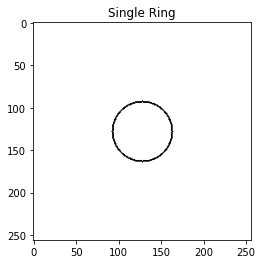

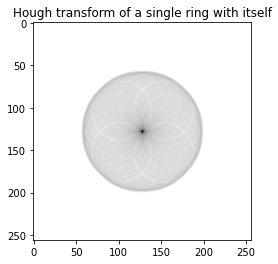

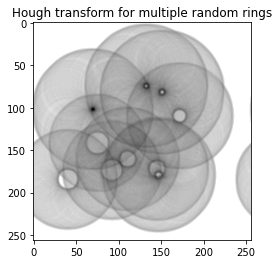

In [6]:
import scipy.fftpack as ft

def Correlate2D(A, B):
    a = ft.fft2(A) 
    b = ft.fft2(B)
    c = a * b.conjugate( )
    C = ft.ifft2(c)
    C = ft.fftshift(C)
    return C

def Circle(size, loc, rad):
    """frame, center, radius size is (v,h) of size of array loc is (v,h) of circle location
    rad is integer of radius returns array with a solid circle"""
    b1,b2 = np.indices( size )
    b1,b2 = b1-loc[0], b2-loc[1]
    mask = b1*b1 + b2*b2
    mask = ( mask <= rad*rad ).astype(int)
    return mask

def Ring(VH, vh, rad):
    a = Circle(VH, vh, rad)
    b = Circle(VH, vh, rad-2)
    answ = a - b
    return answ

def RandomRings(VH, N, rad1, rad2):
    mxrad = max((rad1,rad2)) # maximum
    answ = np.zeros(VH, int)
    vrange = VH[0] - 2*mxrad
    hrange = VH[1] - 2*mxrad
    for i in range( N ):
        v = mxrad + np.random.rand()*vrange
        h = mxrad + np.random.rand()*hrange
        rad = np.random.rand()*(rad2-rad1)+rad1
        temp1 = Circle(VH, (v,h), rad)
        temp2 = Circle(VH, (v,h), rad-2)
        answ = answ | (temp1-temp2)
    return answ

adata = RandomRings((256,256), 10, 20, 40)
plt.title('Multiple Random Rings')
plt.imshow(-(np.sqrt(abs(adata))), cmap='gray')
plt.show()

cdata = Ring((256,256), (128,128), 36)
plt.title('Single Ring')
plt.imshow(-(np.sqrt(abs(cdata))), cmap='gray')
plt.show()

c1data = Correlate2D(cdata, cdata)
plt.title('Hough transform of a single ring with itself')
plt.imshow(-(np.sqrt(abs(c1data))), cmap='gray')
plt.show()

ddata = Correlate2D(adata, cdata)
plt.title('Hough transform for multiple random rings')
plt.imshow(-(np.sqrt(abs(ddata))), cmap='gray')
plt.show()


<br><br><br><br>

## Application

<br>

<b>Consider the image shown below which shows a man holding a cane</b><br><br>

<b>The goal is to detect the presence of a brown cane</b><br><br>

<b>This is performed in two steps with the first isolation brown pixels and the second using a Hough transform to determine if there are brown pixels that form a line</b><br><br>

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lectures13_14_15_16_17_18/L14_2.png?raw=true" width="200"/img></div>
<br><br>

<b>Since color will be used to isolate pixels the image is converted to the YIQ color space</b><br><br>

<b>A few points on the cane were selected and the values of the I and Q values can be found</b><br><br>

<b>These help determine the range of values for the color of the cane</b><br><br>

<br><br>

<b>In the first step pixels that have an I value between 12 and 20 and a Q value between 3.5 and 6.5 will be set to 1</b><br><br>

<b>This will include most of the pixels on the cane as well as other brown pixels mostly from the man's skin</b><br><br>

<b>The entire algorithm is

$\begin{equation}
{\bf b}[\vec y] = H \prod_{\mathcal{L}} 
\begin{Bmatrix}
 \varnothing \\ 12.0 \\ 3.5
\end{Bmatrix}
< \mathcal{L}_{YIQ} {\bf a}[\vec x] <
\begin{Bmatrix}
 \varnothing \\ 20.0 \\ 6.5
\end{Bmatrix}
\end{equation}$
</b><br><br>

<b>The input image is ${\bf a}[\vec x]$ which is converted to YIQ color space (Y - intensity, I & Q are associated with hue)</b><br><br>

<b>The Y channel is not used, and lower and upper thresholds are applied to the other two channels</b><br><br>

<b>These two binary images are multiplied together so that only the pixels that pass both thresholds survive</b><br><br>

<b>The linear Hough transform is applied and the output image is shown</b><br><br>

<b>As seen there is a peak in the output space which indicates the presence of the line</b><br><br>

<b>The peak is in column 7 which corresponds to the angle of the cane which is $7^\circ$ from the vertical</b><br><br>

<br><br>

<b>The entire process is shown below</b><br><br>

<b>The colorsys.rgb function converts one RGB pixel to the YIQ format</b><br><br>

<b>Using the numpy.vectorize function provides a new process that will apply the function to all pixels</b><br><br>

<b>The peak of the resultant image is found to determine the location in Hough space of the indicative signal</b><br><br>

<b>Thus, the presence, location, and orientation of the brown cane are determined</b><br><br>

<br><br>

In [7]:
#  example
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio
import colorsys

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures13_14_15_16_17_18/man.png'
adata = imageio.imread(url)
print('\nOriginal Image Shape:', adata.shape)

rgb_to_yiq = np.vectorize(colorsys.rgb_to_yiq)

bdata = rgb_to_yiq(adata[:,:,0], adata[:,:,1], adata[:,:,2])

print('\nValue of I pixel at (400,310):', round(bdata[1][400,310],2))
print('\nValue of Q pixel at (400,310):', round(bdata[2][400,310],2))

cdata = (bdata[1]>12)*(bdata[1]<20) * (bdata[2]>3.5)*(bdata[2]<6.5)
ddata = LineHough(cdata, 0.5)
print('\nNew Image shape:', ddata.shape)

print('\nLocation of the peak', divmod(ddata.argmax(), 180))

print('\nRepeat for all pixels to isolate the brown cane')


Original Image Shape: (674, 512, 4)

Value of I pixel at (400,310): 13.13

Value of Q pixel at (400,310): 5.52

New Image shape: (846, 90)

Location of the peak (171, 7)

Repeat for all pixels to isolate the brown cane


<br><br>

<b>Let us examine a simple polygon; at triangle</b>

<br><br>

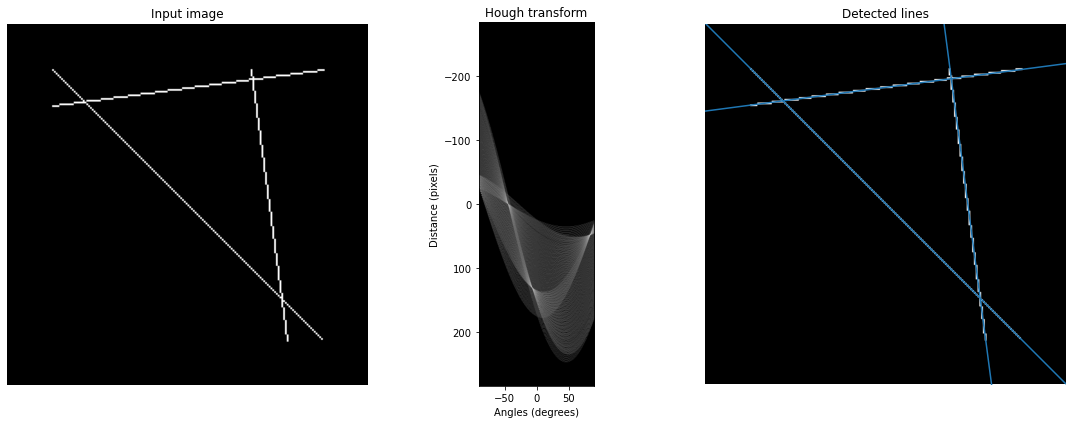

In [8]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm

# Constructing test image
image = np.zeros((200, 200))
idx = np.arange(25, 175)
image[idx, idx] = 255
image[line(45, 25, 25, 175)] = 255
image[line(25, 135, 175, 155)] = 255

# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(image, theta=tested_angles)

# Generating figure
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]
ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi/2))

plt.tight_layout()
plt.show()

<br><br>

### A more practical example

<br><br>

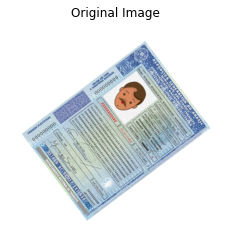

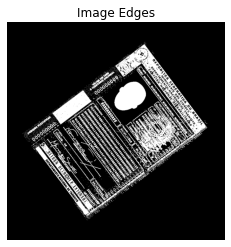

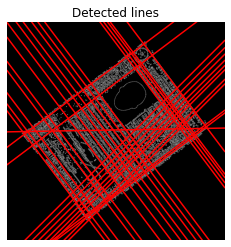


Angle change: 53.0


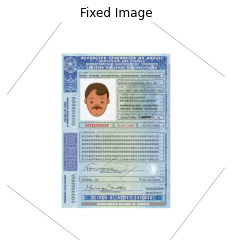

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.color import rgba2rgb
from skimage.transform import rotate
from skimage.transform import (hough_line, hough_line_peaks)
from scipy.stats import mode
from skimage import io
from skimage.filters import threshold_otsu, sobel, threshold_li
from skimage import feature
from matplotlib import cm

"""
To minimize computational cost and noise to detect the most relevant lines in the Hough transform,
we need to binarize the input image
"""
def binarizeImage(RGB_image):
    image = rgb2gray(RGB_image)
    threshold = threshold_li(image)
    bina_image = image < threshold
    return bina_image

"""
We get the image edges using any filter, this is because the document
tilt can be detected only by looking at the borders. This also saves some computational power and avoid noise
"""
def findEdges(bina_image):
    image_edges = feature.canny(bina_image)
    plt.imshow(bina_image, cmap='gray')
    plt.axis('off')
    plt.title('Image Edges')
    plt.show()
    return image_edges

"""
Once we have taken the image borders, the lines and the peaks can be achieved
"""
def findTiltAngle(image_edges):
    h, theta, d = hough_line(image_edges)
    accum, angles, dists = hough_line_peaks(h, theta, d)
    angle = np.rad2deg(mode(angles)[0][0])
    if (angle < 0):
        angle = angle + 90
    else:
        angle = angle - 90

  # Plot Image and Lines    
    fig, ax = plt.subplots()
    ax.imshow(image_edges, cmap='gray')
    origin = np.array((0, image_edges.shape[1]))

    for _, angle1, dist in zip(*hough_line_peaks(h, theta, d)):
        y0, y1 = (dist - origin * np.cos(angle1)) / np.sin(angle1)
        ax.plot(origin, (y0, y1), '-r')

    ax.set_xlim(origin)
    ax.set_ylim((image_edges.shape[0], 0))
    ax.set_axis_off()
    ax.set_title('Detected lines')
    plt.show()

    return angle

"""
Finally, afterwards we have gotten the Hough lines and find the peaks, we can rotate the image based on the angle found
"""
def rotateImage(RGB_image, angle):
    fixed_image = rotate(RGB_image, angle)
    
    plt.imshow(fixed_image)
    plt.axis('off')
    plt.title('Fixed Image')
    plt.show()
    return fixed_image

"""
Create the pipeline
"""
def generalPipeline():
    path = 'C:/Users/pmsqu/Desktop/My_Docs/GMU/Class_Taught_Save/CDS468_Image_Operators/Spring_2023/Lectures/Lecture_10_11_12/'
    img = path + 'Rotate_Image.png'
    
    image = io.imread(img)
    image = rgba2rgb(image)  #  this is a 4 channel png file

    plt.imshow(image)
    plt.axis('off')
    plt.title('Original Image')
    plt.show()

    bina_image = binarizeImage(image)
    image_edges = findEdges(bina_image)
    angle = findTiltAngle(image_edges)
    print('\nAngle change:', angle)
    rotateImage(io.imread(img), angle)
    
generalPipeline()

<br><br>

<b>A much more complicated example</b>

<br><br>

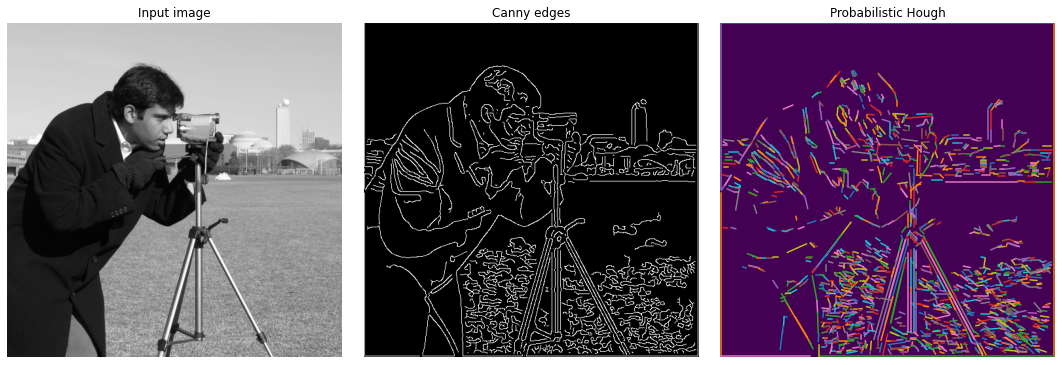

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from skimage.transform import probabilistic_hough_line
from skimage import data
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line

# Line finding using the Probabilistic Hough Transform
image = data.camera()
edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

<br><br><br><br>

## Summary

<br>

<b>The Hough transform is designed to find specific geometric shapes such as a line or a curve</b><br><br>

<b>By far, the most common use is to detect lines in an image</b><br><br>

<b>The Hough transform can find lines of various thickness, any orientation, and any length above a minimum</b><br><br>

<b>The Hough output is $(r,\theta)$ space in which a curve is draw for every point from the line in the input space</b><br><br>

<b>For perfectly straight, thin line all of the curves intersect at one point which is provides information as to the location and angle of the line</b><br><br>

<b>Lines with imperfections in linearity or thickness will create overlapping curves in a small region, which still provides information as to the nature of the line in the image</b><br><br>

<b>The chapter used a real image example to demonstrate the effectiveness of the Hough transform</b><br><br>

<br><br><br><br>

<br><br><br><br>

#  Homework 11

<br><br>

1.  Create an image with frame size (512,512). Place in this image a solid black circle with a radius of 50 at location (200,200). Place another solid circle with a radius of 50 at location (350,350). Compute the Correlate2D transform of the two images.<br><br>

2.  Describe your results